In [ ]:
# just in-case installs
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58647 sha256=52e475cb94daca2e7f60d1306d0cfeca176dcdcd345bce6becafe9fa6fa91f4c
  Stored in directory: /root/.cache/pip/wheels/f8/6e/14/26f84dc04734d9b4614f1a74154aba345568d65c0c145c6543
Successfully built bioinfokit
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 87.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling st

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [ ]:
# peeking at the dataset
df = pd.read_csv("mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
# finding the shape
df.shape


(1453, 15)

In [ ]:
# checking for datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
# Converting categorical columns to numerical
df['yummy'] = df['yummy'].replace({'Yes':1 , 'No':0})
df['convenient'] = df['convenient'].replace({'Yes':1 , 'No':0})
df['spicy'] = df['spicy'].replace({'Yes':1 , 'No':0})
df['fattening'] = df['fattening'].replace({'Yes':1 , 'No':0})
df['greasy'] = df['greasy'].replace({'Yes':1 , 'No':0})
df['fast'] = df['fast'].replace({'Yes':1 , 'No':0})
df['cheap'] = df['cheap'].replace({'Yes':1 , 'No':0})
df['tasty'] = df['tasty'].replace({'Yes':1 , 'No':0})
df['expensive'] = df['expensive'].replace({'Yes':1 , 'No':0})
df['healthy'] = df['healthy'].replace({'Yes':1 , 'No':0})
df['disgusting'] = df['disgusting'].replace({'Yes':1 , 'No':0})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [ ]:
# Extracting the eleven columns from df
df1 = df.iloc[:,0:11]
df1.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:

yummy =print(((df1['yummy'].value_counts(normalize=True)*100)[1]))

55.26496902959395


In [ ]:
convenient =print(((df1['convenient'].value_counts(normalize=True)*100)[1]))

90.77770130763938


In [ ]:
spicy =print(((df1['spicy'].value_counts(normalize=True)*100)[1]))

9.359944941500343


In [ ]:
# Principal Component Analysis
pca = PCA(n_components=11)
principal_components = pca.fit_transform(df1)
pca_df = pd.DataFrame(data=principal_components,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [ ]:
pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11']].std()

PCA1     0.757050
PCA2     0.607456
PCA3     0.504619
PCA4     0.398799
PCA5     0.337405
PCA6     0.310275
PCA7     0.289697
PCA8     0.275122
PCA9     0.265251
PCA10    0.248842
PCA11    0.236903
dtype: float64

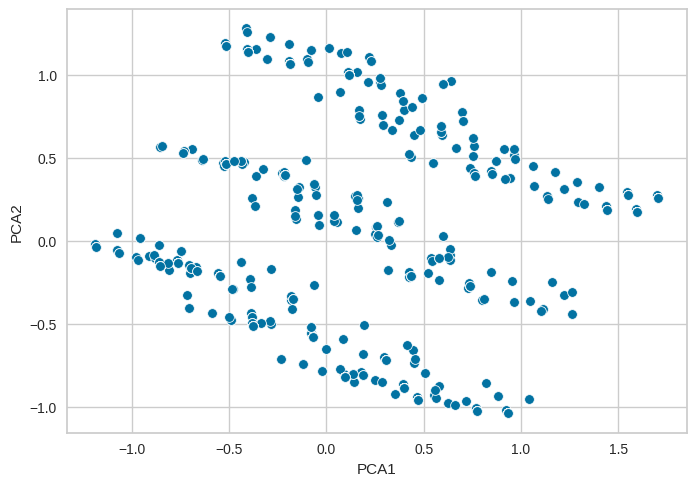

In [ ]:
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2',palette='deep')
plt.show()

Extracting Segments

Elbow method for finding the optimal number of clusters

In [ ]:
# Using elbow method
wcss = []
for i in range(1,11):
  # init is used for initializing the centroid
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 10)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)


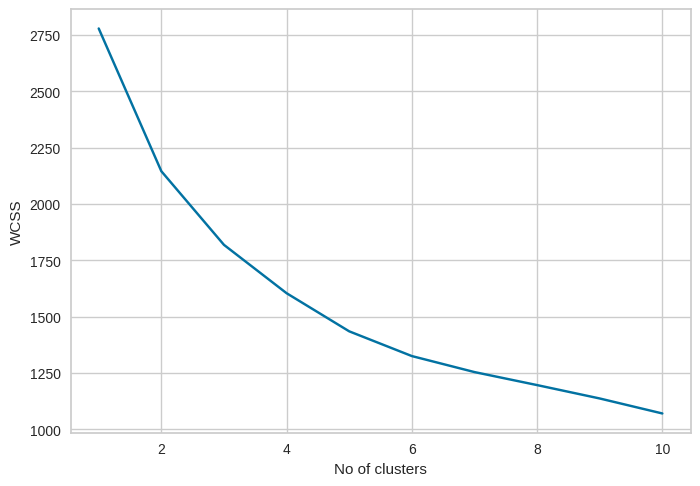

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel(range(1,11))
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

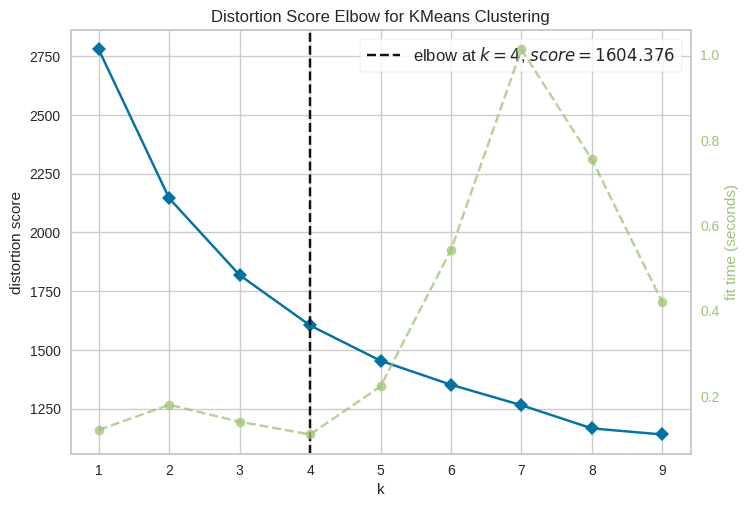

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans2 = KMeans()
visualizer = KElbowVisualizer(kmeans2, k=(1,10))
visualizer.fit(df1)
visualizer.show()

In [ ]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df1)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)


In [ ]:

pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,1
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,0
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,0
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,3
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,1


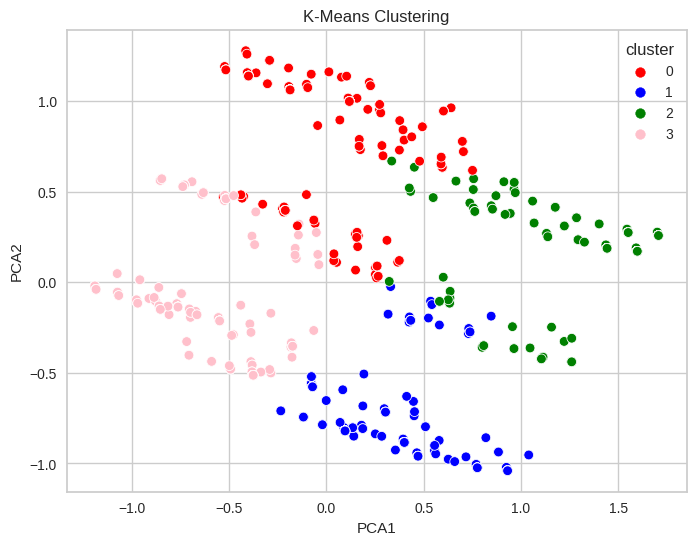

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','blue','green','pink','yellow'])
plt.title('K-Means Clustering')
plt.show()


In [ ]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df1)
pca_df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2


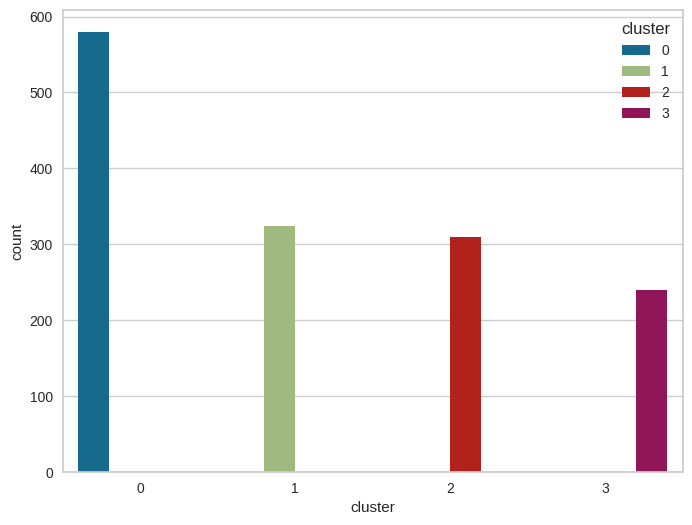

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster', data=pca_df_kmeans1, hue='cluster')
plt.show()


In [ ]:
pca_df_kmeans1['cluster'].value_counts(normalize=True)*100

0    39.917412
1    22.298692
2    21.266345
3    16.517550
Name: cluster, dtype: float64

Profiling Segments

In [ ]:
cluster1_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==0]
cluster1_analysis.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
3,1,1,0,1,1,1,1,1,0,0,1,0
5,1,1,0,1,0,1,1,1,0,0,0,0
7,1,1,0,1,1,1,1,1,0,0,0,0
15,1,1,0,1,0,1,1,1,0,0,0,0
16,1,1,0,1,1,1,1,1,0,0,0,0


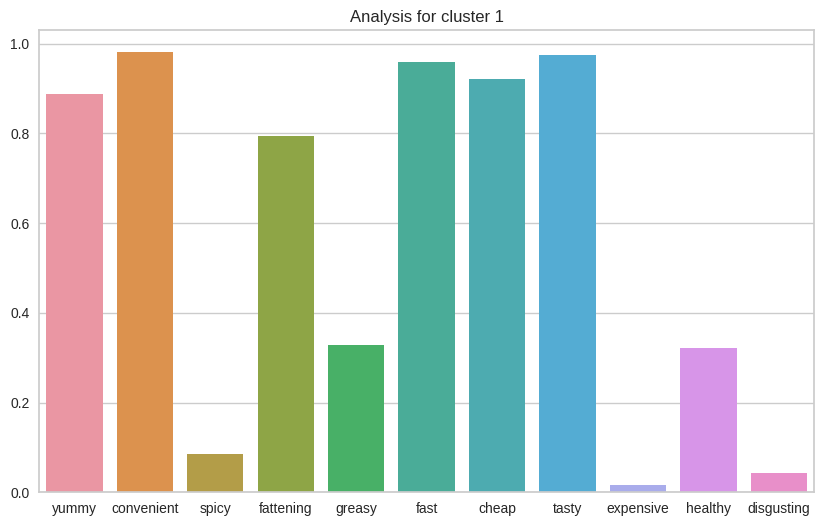

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 1')
plt.show()


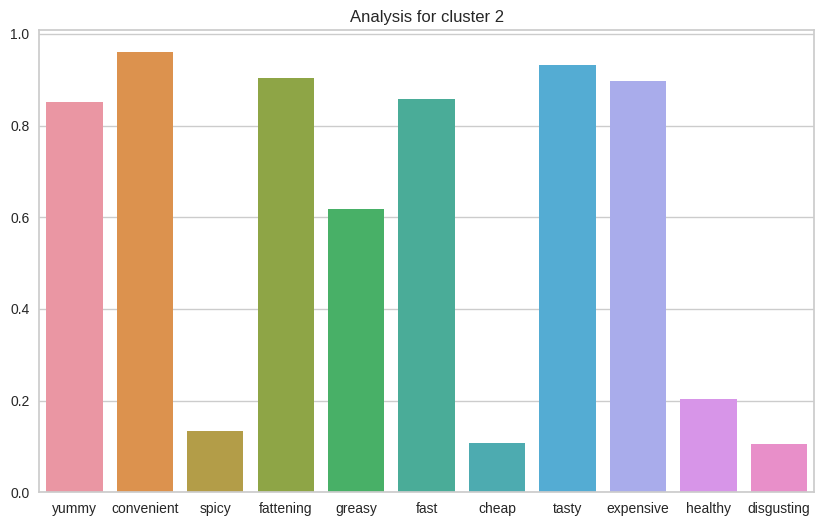

In [ ]:
cluster2_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==1]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster2_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 2')
plt.show()

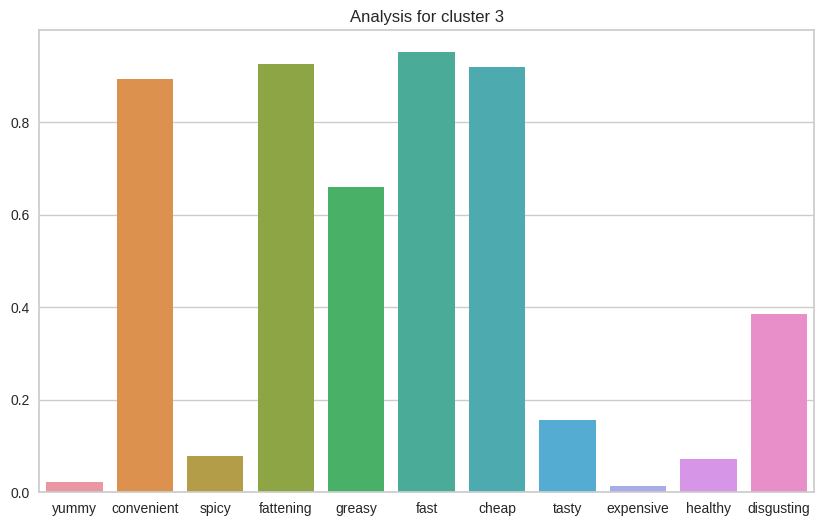

In [ ]:
cluster3_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==2]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 3')
plt.show()

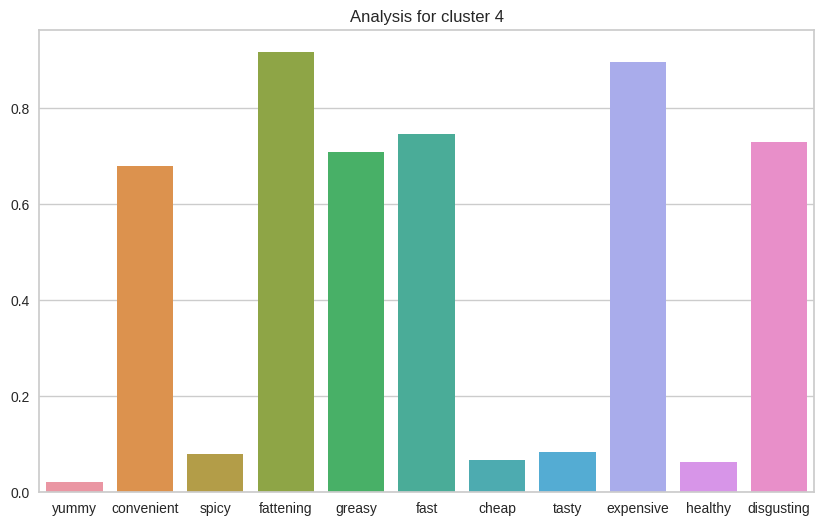

In [ ]:
cluster4_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==3]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 4')
plt.show()

Describing Segments

In [ ]:
df= pd.concat([df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2


In [ ]:

df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [ ]:
df['Like'] = df['Like'].replace({'I hate it!-5':0 ,'-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df.tail()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,Once a year,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,Once a week,Female,0
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,Once a month,Female,1
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,Every three months,Male,0
1452,0,1,0,1,1,0,0,0,1,0,1,2,30,Every three months,Male,3


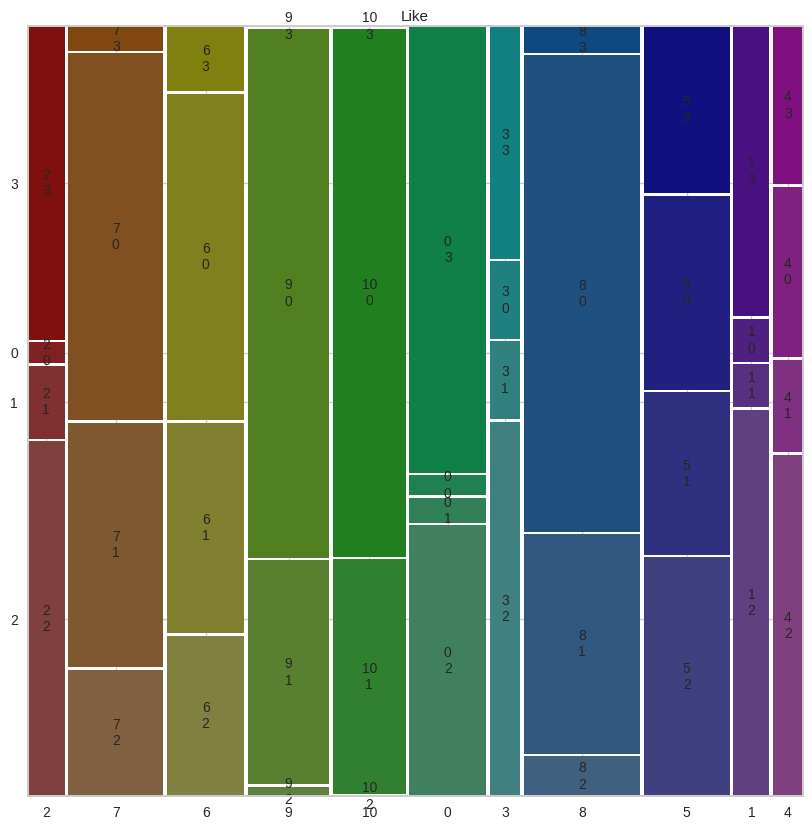

In [ ]:
plt.rcParams['figure.figsize']=(10,10)
mosaic(df,['Like','cluster'])
plt.xlabel('Like')
plt.show()


In [ ]:

df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

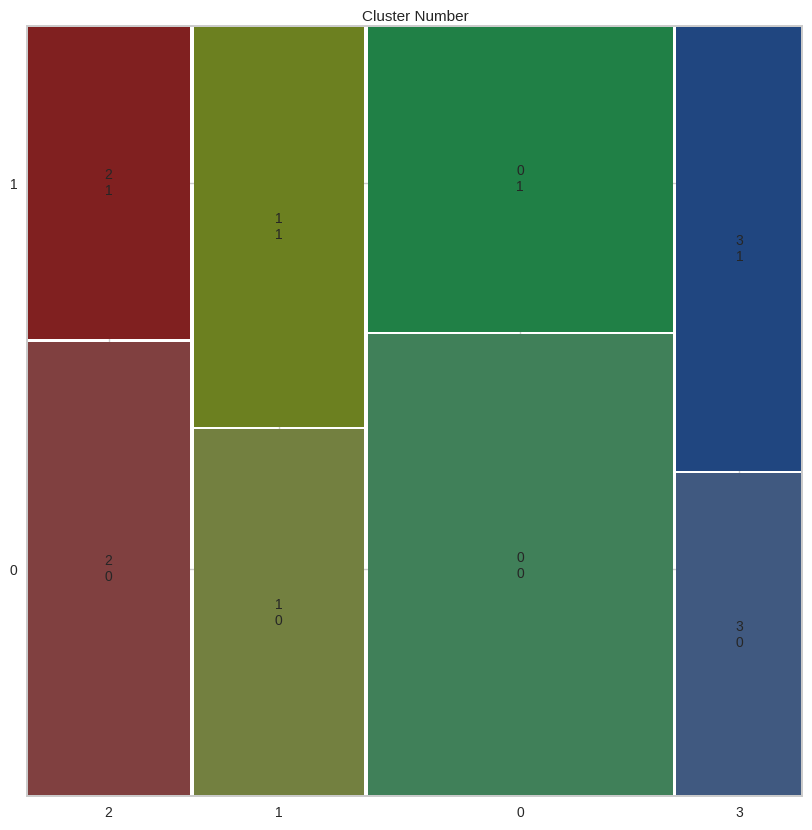

In [ ]:


mosaic(df,['cluster','Gender'])
plt.xlabel('Cluster Number')
plt.show()


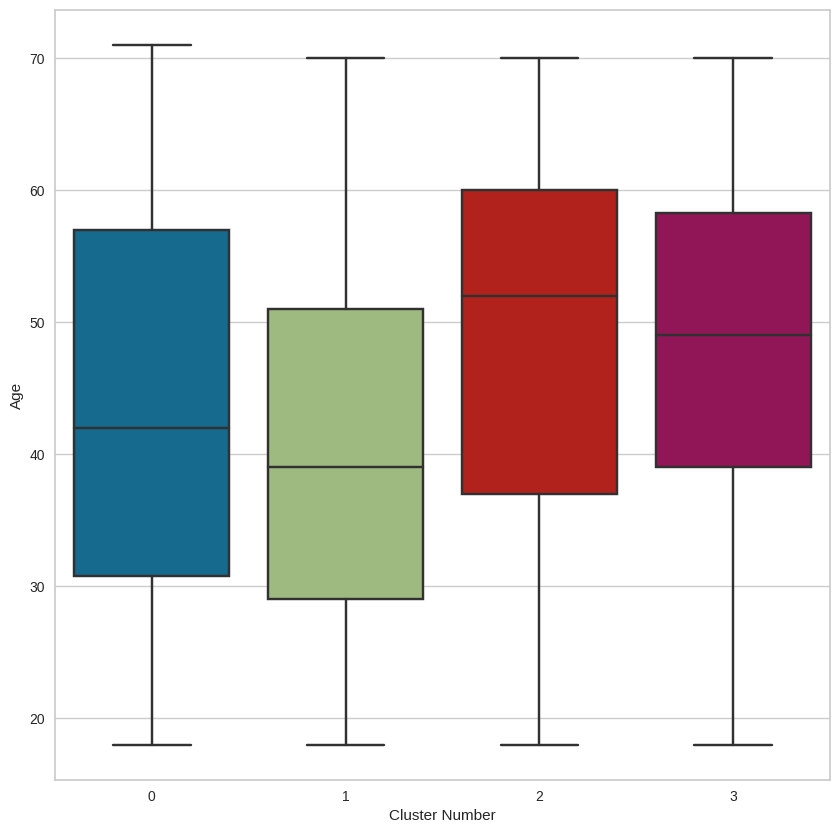

In [ ]:
sns.boxplot(x=df['cluster'], y=df['Age'])
plt.xlabel('Cluster Number')
plt.show()


Selecting the Target Segment

In [ ]:
df['VisitFrequency'].value_counts()

3    439
4    342
5    252
1    235
0    131
2     54
Name: VisitFrequency, dtype: int64

In [ ]:
df['VisitFrequency'] = df['VisitFrequency'].replace({'Never':0, 'Once a week':1, 'More than once a week':2, 'Once a month':3, 'Every three months':4, 'Once a year':5})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,4,0,2
1,1,1,0,1,1,1,1,1,1,0,0,7,51,4,0,1
2,0,1,1,1,1,1,0,1,1,1,0,6,62,4,0,1
3,1,1,0,1,1,1,1,1,0,0,1,9,69,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,2


In [ ]:
X = df.iloc[:,0:15]
Y = df.iloc[:,15]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)

(1017, 15)
(436, 15)


In [ ]:
X_test.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1176,1,1,0,1,1,1,1,1,0,1,0,9,35,3,0
1332,1,1,0,1,1,1,0,1,1,0,0,9,40,1,0
941,1,0,0,1,1,1,0,1,1,0,0,9,21,3,0
878,1,1,0,1,1,1,1,1,1,1,0,9,34,1,0
35,0,1,0,1,1,1,1,0,0,0,1,3,54,4,0


In [ ]:

Y_test.head()

1176    0
1332    1
941     1
878     1
35      2
Name: cluster, dtype: int32

In [ ]:
dc = DecisionTreeClassifier(random_state=1234)
model = dc.fit(X, Y)

In [ ]:
text_representation = tree.export_text(dc)
print(text_representation)


|--- feature_8 <= 0.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_10 >  0.50
|   |   |   |   |--- class: 3
|   |   |--- feature_6 >  0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |--- f

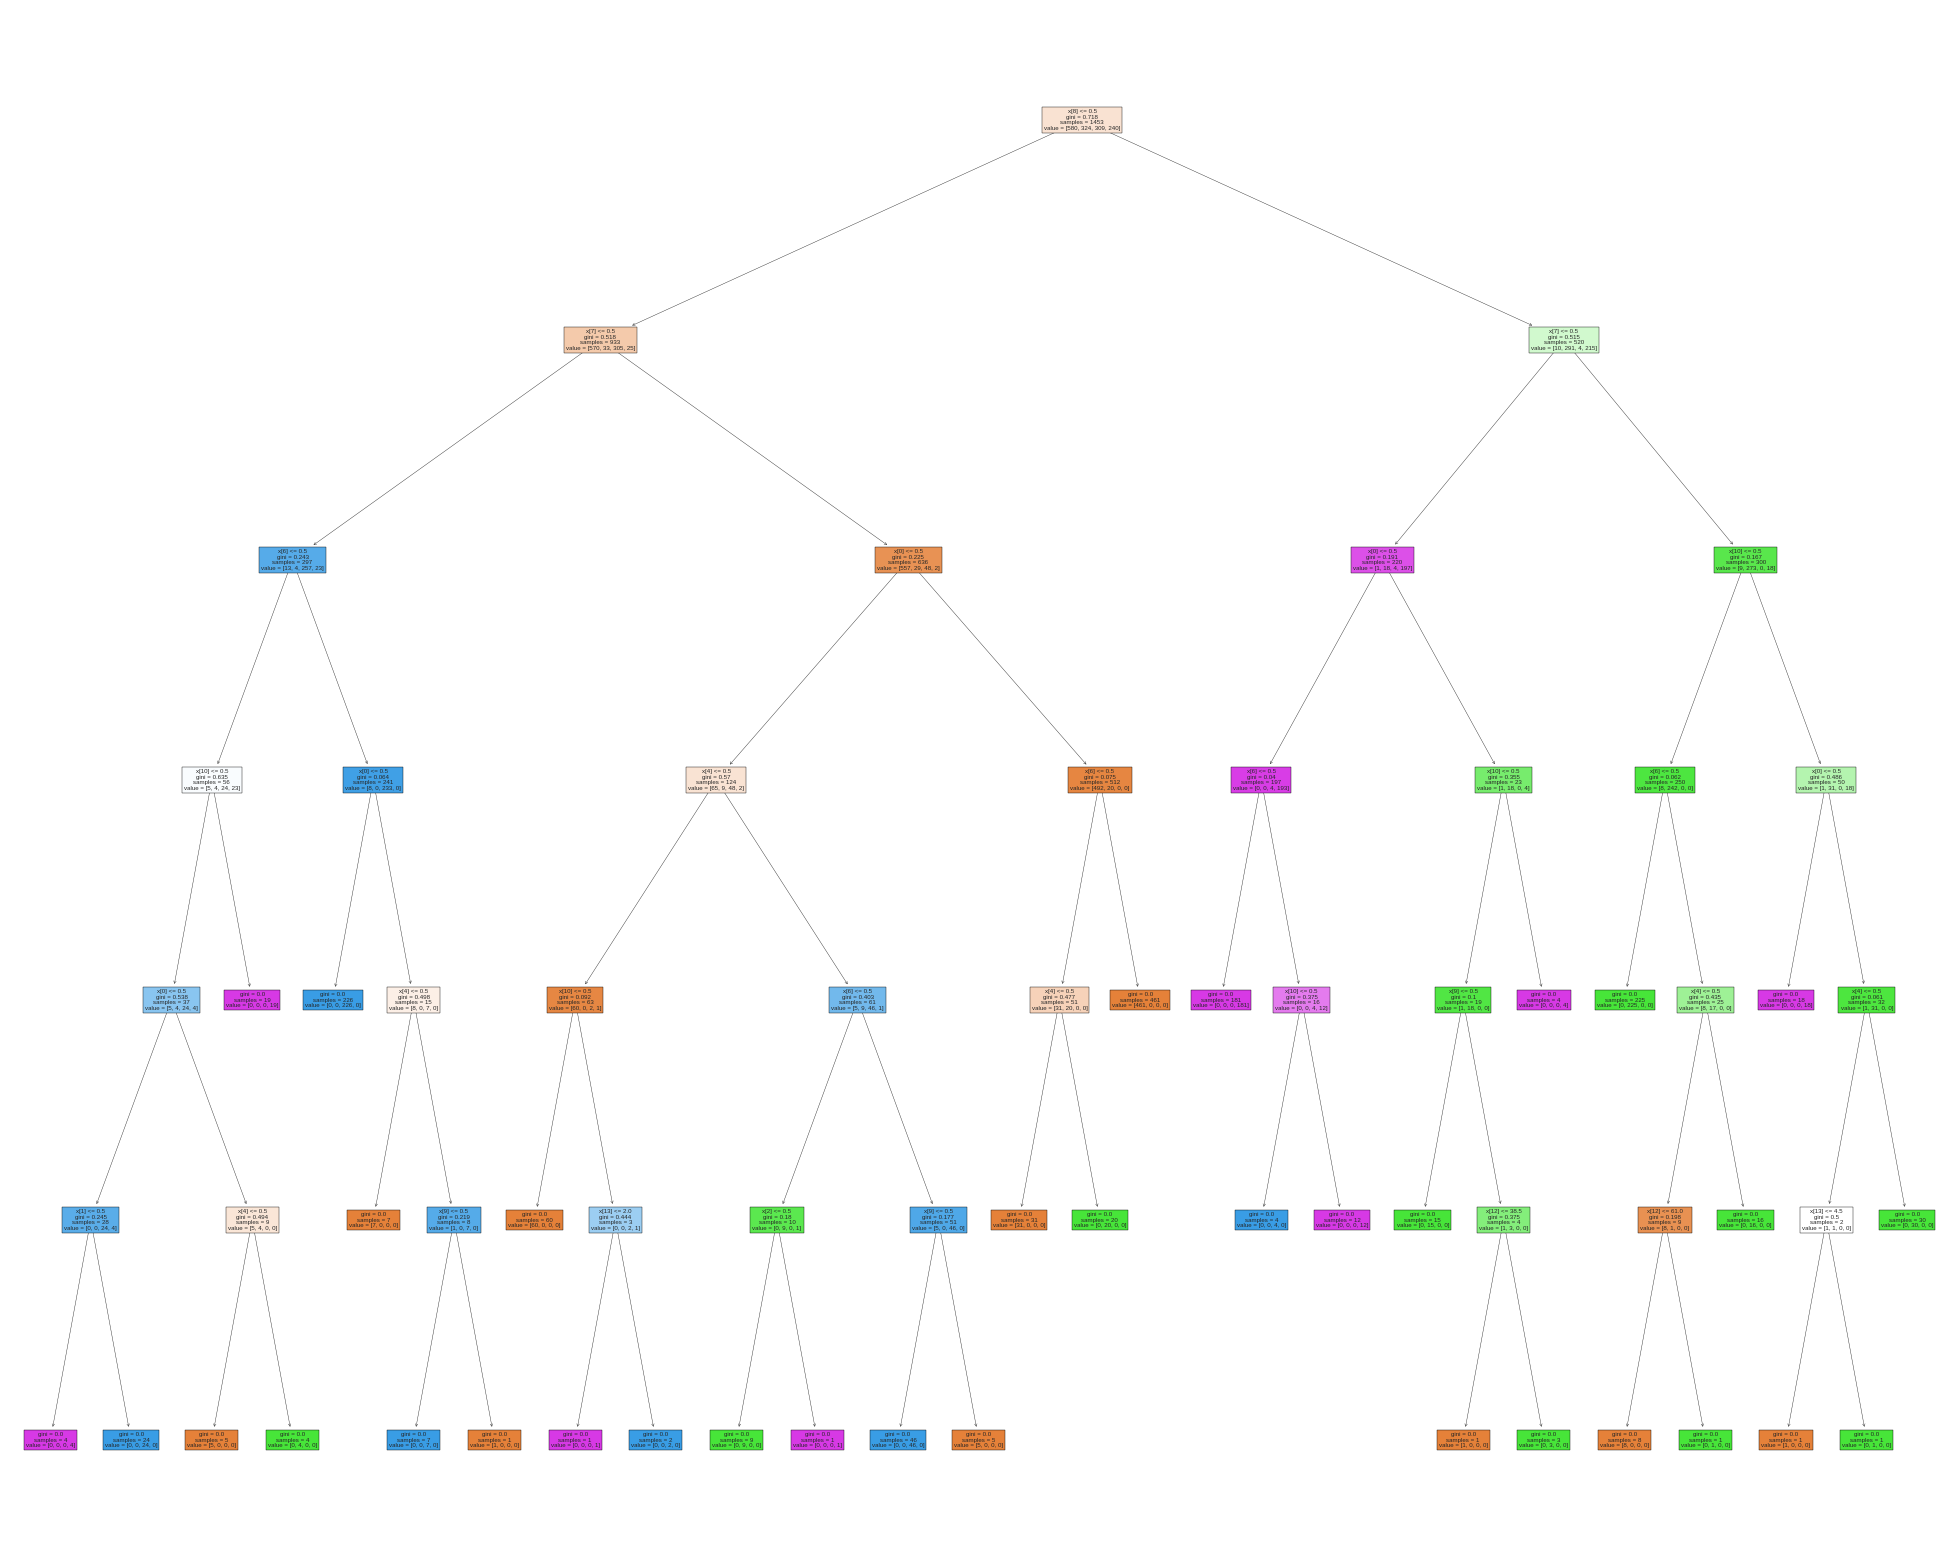

In [ ]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dc, filled=True)